# Introduction to Data Science

This is a presentation given to Iowa State University's Women's Alliance for Cybersecurity on April 7th, 2018.

## What is data science?

When a statistician and a database administrator love each other very much, they share a special hug, and 9 months later a data scientist is born.

"Data science" is not a well-defined field. Here's how I think about it\*:
- **Data management:** Storing and moving data effectively within an organization
- **Data analysis:** Using data to learn about the world and make decisions
    - **Mathematical modeling:** Analysis via mathematical models
        - **Statistics:** Analyzing the process that generated the data
        - **Machine learning:** Making predictions
    - **Data visualization:** Analysis via charts, interactive dashboards, etc.
    
These are not mutually exclusive: A plot may include statistical error bars, a machine learning method may require more data than fits in memory, etc.

I will focus more on the data analysis side of things in this presentation.

###### \*Many people will disagree with this breakdown.

## Why should this interest women in cybersecurity?

Deciding whether to flag an event as a potential threat, particularly automatically, is a data-driven task:
- Log files are data. This dataset can become quite large over time.
- What features of an event would make you suspicious of it? What does a "typical event" look like?
- Relatedly, is there a way to measure the similarity of events to each other?
- False negatives are far more problematic than false positives.
- These classifications need to be performed in real time.

This touches on many aspects of data science.

## Example

This example will demonstrate some of the commonly-used Python data science packages. We will look at a small subset of Los Alamos National Laboratory's [Network Event Dataset](https://csr.lanl.gov/data/2017.html).

First, we set things up with the following libraries:
- [Matplotlib](https://matplotlib.org/) is Python's most well-established plotting package. It is great for static, 2-dimensional plots, but not great for anything else.
- [Pandas](http://pandas.pydata.org/) provides data frames, which are a fundamental data structure in data science. Data frames allow for easy, intuitive manipulation of datasets.
- [Seaborn](http://seaborn.pydata.org/) improves Matplotlib's default plot styles, and provides tools to make relatively complex plots quickly.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# This allows Matplotlib to play nicely with the Jupyter notebook format
%matplotlib inline

# This replaces Matplotlib's ugly default plot styles with something more pleasant
sns.set()

Import the dataset into a Pandas `DataFrame`:

In [2]:
dat = pd.read_feather("data/network_event_data.feather")

Field descriptions from the website:
- **`time`:** The start time of the event in epoch time format
- **`duration`:** The duration of the event in seconds.
- **`src_device`:** The device that likely initiated the event.
- **`dst_device`:** The receiving device.
- **`protocol`:** The protocol number.
- **`src_port`:** The port used by the SrcDevice.
- **`dst_port`:** The port used by the DstDevice.
- **`src_packets`:** The number of packets the SrcDevice sent during the event.
- **`dst_packets`:** The number of packets the DstDevice sent during the event.
- **`src_bytes`:** The number of bytes the SrcDevice sent during the event.
- **`dst_bytes`:** The number of bytes the DstDevice sent during the event.

In [3]:
dat.head()

,time,duration,src_device,dst_device,protocol,src_port,dst_port,src_packets,dst_packets,src_bytes,dst_bytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
time           200000 non-null int64
duration       200000 non-null int64
src_device     200000 non-null object
dst_device     200000 non-null object
protocol       200000 non-null int64
src_port       200000 non-null object
dst_port       200000 non-null object
src_packets    200000 non-null int64
dst_packets    200000 non-null int64
src_bytes      200000 non-null int64
dst_bytes      200000 non-null int64
dtypes: int64(7), object(4)
memory usage: 16.8+ MB


### Distributions of Event Features

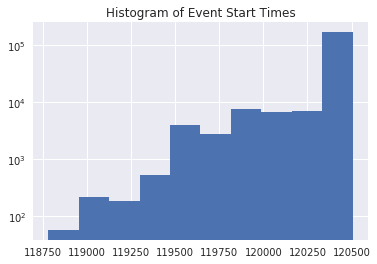

In [5]:
ax = dat["time"].hist(log=True)
ax.set_title("Histogram of Event Start Times");

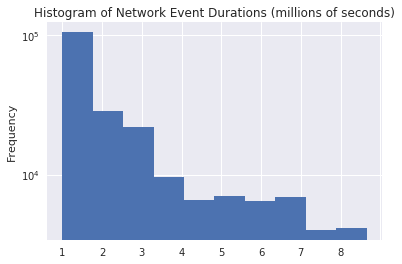

In [6]:
ax = dat["duration"].plot(kind="hist", log=True)
ax.set(title="Histogram of Network Event Durations (millions of seconds)",
       xticklabels=[str(i) for i in range(9)]);